In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('rol7+4Y.csv', index_col=0)

In [44]:
df_pi = df
# kospi shifting -day
df_pi['pi_shift(1)'] = df_pi['kospi_cost'].shift(-1)
df_pi['pi2_shift(1)'] = df_pi['kospi200_cost'].shift(-1)
df_pi['daq_shift(1)'] = df_pi['kosdaq_cost'].shift(-1)
df_pi['daq1_shift(1)'] = df_pi['kosdaq100_cost'].shift(-1)

In [45]:
df_kospi = df_pi.drop(['kospi200_cost', 'kosdaq_cost','kosdaq100_cost',
                       'pi2_shift(1)','daq_shift(1)','daq1_shift(1)'], axis=1)

df_kosdaq = df_pi.drop(['kospi200_cost', 'kospi_cost','kosdaq100_cost',
                       'pi2_shift(1)','pi_shift(1)','daq1_shift(1)'], axis=1)

In [46]:
df_kospi.dropna(axis=0, inplace = True)

In [47]:
Kpi_X = df_kospi.drop(['pi_shift(1)'], axis=1)
Kpi_y = df_kospi['pi_shift(1)']

In [48]:
train_X = Kpi_X.iloc[:-5,:]
train_y = Kpi_y.iloc[:-5]

test_X = Kpi_X.iloc[-5:,:]
test_y = Kpi_y.iloc[-5:]

In [49]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

model = xgb.XGBRegressor()

params = {
    'learning_rate' : [0.03, 0.05, 0.07],
    'max_depth' : [5, 6, 7],
    'gamma' : [0.01, 0.03, 0.05, 0.07],
    'n_estimators': [100, 200, 300, 400, 500]
}

xgb_grid = GridSearchCV(model, params, cv=2, n_jobs=5, verbose=True)
xgb_grid.fit(train_X, train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
0.21306737130688036
{'gamma': 0.05, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 500}


In [51]:
# params
lr = 0.07
n_estimator = 500
gamma = 0.05
max_depth = 6

model_tree = xgb.XGBRegressor(booster='gbtree', eval_metric='mae',
                              learning_rate=lr, n_estimators=n_estimator, gamma=gamma, max_depth = max_depth)

model_tree.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', feature_types=None, gamma=0.05, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.07, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
tree_pred = model_tree.predict(test_X)

mae_tree = mean_absolute_error(tree_pred, test_y)
mape = mean_absolute_percentage_error(tree_pred, test_y)

print('mae: {}'.format(mae_tree))
print('mape: {}'.format(mape))

mae: 23.375455078125107
mape: 0.010421866988092932


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

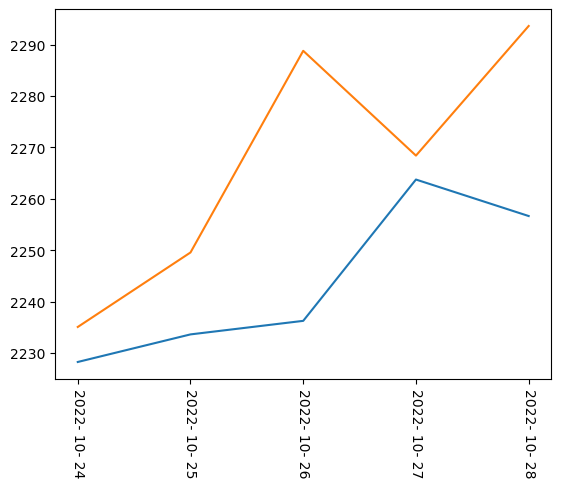

In [53]:
plt.plot(tree_pred)
plt.plot(test_y)
plt.xticks(rotation =270)

In [55]:
df_kosdaq.dropna(axis=0, inplace = True)

Kdaq_X = df_kosdaq.drop(['daq_shift(1)'], axis=1)
Kdaq_y = df_kosdaq['daq_shift(1)']

train_X = Kdaq_X.iloc[:-5,:]
train_y = Kdaq_y.iloc[:-5]

test_X = Kdaq_X.iloc[-5:,:]
test_y = Kdaq_y.iloc[-5:]

model = xgb.XGBRegressor()

In [56]:
params = {
    'learning_rate' : [0.03, 0.05, 0.07],
    'max_depth' : [5, 6, 7],
    'gamma' : [0.01, 0.03, 0.05, 0.07],
    'n_estimators': [100, 200, 300, 400, 500]
}

xgb_grid = GridSearchCV(model, params, cv=2, n_jobs=5, verbose=True)
xgb_grid.fit(train_X, train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
0.6329571632192361
{'gamma': 0.07, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 200}


In [57]:
# params
lr = 0.07
n_estimator = 200
gamma = 0.05
max_depth = 7

model_tree = xgb.XGBRegressor(booster='gbtree', eval_metric='mae',
                              learning_rate=lr, n_estimators=n_estimator, gamma=gamma, max_depth = max_depth)

model_tree.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', feature_types=None, gamma=0.05, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.07, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
tree_pred = model_tree.predict(test_X)

mae_tree = mean_absolute_error(tree_pred, test_y)
mape = mean_absolute_percentage_error(tree_pred, test_y)

print('mae: {}'.format(mae_tree))
print('mape: {}'.format(mape))

mae: 11.053397460937527
mape: 0.016299933531014728


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

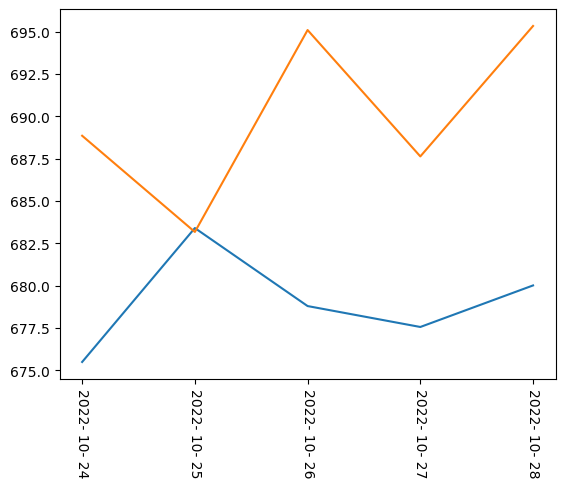

In [59]:
plt.plot(tree_pred)
plt.plot(test_y)
plt.xticks(rotation =270)